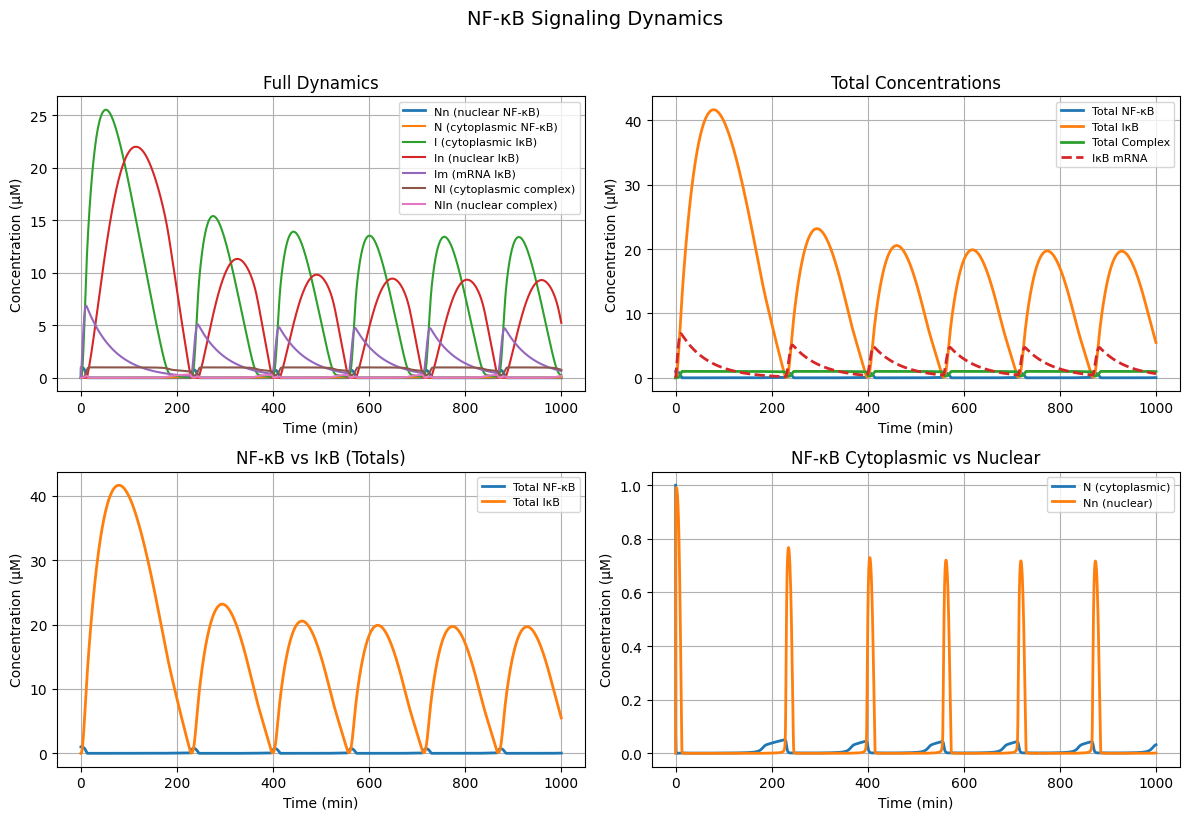

In [1]:
from CytoNuc_rovnice import NFkBSystemExact
from CytoNuc_params import CytoNucParamsExact
from CytoNuc_simulacia import NFkBSimulatorExact


params = CytoNucParamsExact()
system = NFkBSystemExact(params)
sim = NFkBSimulatorExact(system)

sol = sim.simulate(t_span=(0, 1000))
sim.plot_all(sol)
